In [55]:
import pandas as pd
import numpy as np
from sklearn import model_selection, ensemble, linear_model, neural_network, metrics, inspection
from soyviz import plot_los_tres, plot_estres
import matplotlib.pyplot as plt
from combat.pycombat import pycombat
from pickle import load, dump

In [56]:
venancio = pd.read_parquet('../expresion/venancio_bias_corrected.parquet')
venancio

Gene          Glyma.01G000100  Glyma.01G000137  Glyma.01G000174  \
SAMD00025071               16                4               11   
SAMD00025072                9                2                3   
SAMD00025073               16                4               10   
SAMD00133785                0                0                1   
SAMD00133786                0                0                0   
...                       ...              ...              ...   
SAMN14277281               47                4                6   
SAMN14277282               68                6               10   
SAMN14277283              270               33               49   
SAMN14277284              176               37               31   
SAMN14277285               91               22               15   

Gene          Glyma.01G000211  Glyma.01G000248  Glyma.01G000285  \
SAMD00025071                2                5               12   
SAMD00025072                0                0                2   
SAMD00025073                0               13               11   
SAMD00133785                6                0                0   
SAMD00133786                0                0                2   
...                       ...              ...              ...   
SAMN14277281                8                4                6   
SAMN14277282               16                3                7   
SAMN14277283               60               34               25   
SAMN14277284               66               30               24   
SAMN14277285               33               27               21   

Gene          Glyma.01G000322  Glyma.01G000359  Glyma.01G000400  \
SAMD00025071               11                8               70   
SAMD00025072                6                1               17   
SAMD00025073                9                7               76   
SAMD00133785               69                0              209   
SAMD00133786               44                0              143   
...                       ...              ...              ...   
SAMN14277281               15               20              752   
SAMN14277282               25               16              898   
SAMN14277283               70               68              826   
SAMN14277284               83               29             1182   
SAMN14277285               42               34              868   

Gene          Glyma.01G000600  ...  Glyma.U044501  Glyma.U044700  \
SAMD00025071              102  ...              0              0   
SAMD00025072               31  ...              0              0   
SAMD00025073              102  ...              0              0   
SAMD00133785              101  ...              0              0   
SAMD00133786              190  ...              0              0   
...                       ...  ...            ...            ...   
SAMN14277281              517  ...              0              0   
SAMN14277282              503  ...              0              4   
SAMN14277283              622  ...              0              0   
SAMN14277284              764  ...              0              0   
SAMN14277285              537  ...              0              0   

Gene          Glyma.U044800  Glyma.U045000  Glyma.U045100  Glyma.U045402  \
SAMD00025071              0              0              0              1   
SAMD00025072              0              0              0              1   
SAMD00025073              0              0              0              4   
SAMD00133785              0              0              0              0   
SAMD00133786              0              0              0              3   
...                     ...            ...            ...            ...   
SAMN14277281              0              0              0              1   
SAMN14277282              0              0              3             10   
SAMN14277283              0              0              0             15   
SAMN1427

In [57]:
annot = pd.read_csv('../anotacion/gemini_annot1.csv', index_col=0)
annot = annot[annot['tejido'].notna() & annot['estres'].notna()]
# annot = annot.loc[(annot['tejido'] == 'leaf') | (annot['tejido'] == 'root') | (annot['tejido'] == 'seed') | (annot['tejido'] == 'stem')]
annot

bioproject    tejido  estres tratamiento
biosample                                              
SAMD00235524   PRJDB10183  seedling  fungus     control
SAMD00235525   PRJDB10183  seedling  fungus     control
SAMD00235526   PRJDB10183  seedling  fungus     control
SAMD00235527   PRJDB10183  seedling  fungus     control
SAMD00235528   PRJDB10183  seedling  fungus     control
...                   ...       ...     ...         ...
SAMN36760719  PRJNA999924      seed    cold   treatment
SAMN36760720  PRJNA999924      seed    cold   treatment
SAMN36760721  PRJNA999924      seed    cold   treatment
SAMN36760722  PRJNA999924      seed    cold   treatment
SAMN36760723  PRJNA999924      seed    cold   treatment

[5581 rows x 4 columns]

# Exp. 1

## Preprocesado

In [58]:
venancio, annot = venancio.align(annot, join='inner', axis=0)
venancio

Gene          Glyma.01G000100  Glyma.01G000137  Glyma.01G000174  \
SAMD00133785                0                0                1   
SAMD00133786                0                0                0   
SAMD00216748               56               22               35   
SAMD00216750               43               27               21   
SAMD00216751               66               18               27   
...                       ...              ...              ...   
SAMN14277281               47                4                6   
SAMN14277282               68                6               10   
SAMN14277283              270               33               49   
SAMN14277284              176               37               31   
SAMN14277285               91               22               15   

Gene          Glyma.01G000211  Glyma.01G000248  Glyma.01G000285  \
SAMD00133785                6                0                0   
SAMD00133786                0                0                2   
SAMD00216748               28               65               47   
SAMD00216750               14               33               29   
SAMD00216751               27               49               28   
...                       ...              ...              ...   
SAMN14277281                8                4                6   
SAMN14277282               16                3                7   
SAMN14277283               60               34               25   
SAMN14277284               66               30               24   
SAMN14277285               33               27               21   

Gene          Glyma.01G000322  Glyma.01G000359  Glyma.01G000400  \
SAMD00133785               69                0              209   
SAMD00133786               44                0              143   
SAMD00216748               83               17              793   
SAMD00216750               58               12              462   
SAMD00216751               38                9              240   
...                       ...              ...              ...   
SAMN14277281               15               20              752   
SAMN14277282               25               16              898   
SAMN14277283               70               68              826   
SAMN14277284               83               29             1182   
SAMN14277285               42               34              868   

Gene          Glyma.01G000600  ...  Glyma.U044501  Glyma.U044700  \
SAMD00133785              101  ...              0              0   
SAMD00133786              190  ...              0              0   
SAMD00216748              606  ...              0              0   
SAMD00216750              476  ...              0              0   
SAMD00216751              234  ...             21              0   
...                       ...  ...            ...            ...   
SAMN14277281              517  ...              0              0   
SAMN14277282              503  ...              0              4   
SAMN14277283              622  ...              0              0   
SAMN14277284              764  ...              0              0   
SAMN14277285              537  ...              0              0   

Gene          Glyma.U044800  Glyma.U045000  Glyma.U045100  Glyma.U045402  \
SAMD00133785              0              0              0              0   
SAMD00133786              0              0              0              3   
SAMD00216748              0              3              0             18   
SAMD00216750              0              0              0             12   
SAMD00216751              0              0              0              9   
...                     ...            ...            ...            ...   
SAMN14277281              0              0              0              1   
SAMN14277282              0              0              3             10   
SAMN14277283              0              0              0             15   
SAMN1427

In [59]:
consamples = annot['bioproject'].map(annot['bioproject'].value_counts() > 2)
convarianza = venancio.var() > 0.01

filtrado = venancio.loc[consamples, convarianza]

filtrado

Gene          Glyma.01G000100  Glyma.01G000137  Glyma.01G000174  \
SAMD00133785                0                0                1   
SAMD00133786                0                0                0   
SAMD00216748               56               22               35   
SAMD00216750               43               27               21   
SAMD00216751               66               18               27   
...                       ...              ...              ...   
SAMN14277281               47                4                6   
SAMN14277282               68                6               10   
SAMN14277283              270               33               49   
SAMN14277284              176               37               31   
SAMN14277285               91               22               15   

Gene          Glyma.01G000211  Glyma.01G000248  Glyma.01G000285  \
SAMD00133785                6                0                0   
SAMD00133786                0                0                2   
SAMD00216748               28               65               47   
SAMD00216750               14               33               29   
SAMD00216751               27               49               28   
...                       ...              ...              ...   
SAMN14277281                8                4                6   
SAMN14277282               16                3                7   
SAMN14277283               60               34               25   
SAMN14277284               66               30               24   
SAMN14277285               33               27               21   

Gene          Glyma.01G000322  Glyma.01G000359  Glyma.01G000400  \
SAMD00133785               69                0              209   
SAMD00133786               44                0              143   
SAMD00216748               83               17              793   
SAMD00216750               58               12              462   
SAMD00216751               38                9              240   
...                       ...              ...              ...   
SAMN14277281               15               20              752   
SAMN14277282               25               16              898   
SAMN14277283               70               68              826   
SAMN14277284               83               29             1182   
SAMN14277285               42               34              868   

Gene          Glyma.01G000600  ...  Glyma.U044501  Glyma.U044700  \
SAMD00133785              101  ...              0              0   
SAMD00133786              190  ...              0              0   
SAMD00216748              606  ...              0              0   
SAMD00216750              476  ...              0              0   
SAMD00216751              234  ...             21              0   
...                       ...  ...            ...            ...   
SAMN14277281              517  ...              0              0   
SAMN14277282              503  ...              0              4   
SAMN14277283              622  ...              0              0   
SAMN14277284              764  ...              0              0   
SAMN14277285              537  ...              0              0   

Gene          Glyma.U044800  Glyma.U045000  Glyma.U045100  Glyma.U045402  \
SAMD00133785              0              0              0              0   
SAMD00133786              0              0              0              3   
SAMD00216748              0              3              0             18   
SAMD00216750              0              0              0             12   
SAMD00216751              0              0              0              9   
...                     ...            ...            ...            ...   
SAMN14277281              0              0              0              1   
SAMN14277282              0              0              3             10   
SAMN14277283              0              0              0             15   
SAMN1427

In [60]:
filtrado, annot = filtrado.align(annot, join='inner', axis=0)

combat = pycombat(filtrado.T, annot['bioproject']).T
combat

Found 178 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.


/home/godo/.local/lib/python3.10/site-packages/combat/pycombat.py:159: RuntimeWarning:

divide by zero encountered in divide

/home/godo/.local/lib/python3.10/site-packages/combat/pycombat.py:158: RuntimeWarning:

divide by zero encountered in divide



Adjusting the Data


Gene          Glyma.01G000100  Glyma.01G000137  Glyma.01G000174  \
SAMD00133785        53.221050         6.514738        18.978913   
SAMD00133786        53.221050         6.514738        16.999854   
SAMD00216748        50.086823        13.834746        29.619080   
SAMD00216750        32.559249        18.280449        11.548519   
SAMD00216751        63.569572        10.278184        19.293045   
...                       ...              ...              ...   
SAMN14277281       -13.025753        -7.165808         2.659437   
SAMN14277282         3.523101        -5.614297         5.617615   
SAMN14277283       162.707314        15.331111        34.459857   
SAMN14277284        88.631492        18.434135        21.148053   
SAMN14277285        21.648036         6.797797         9.315339   

Gene          Glyma.01G000211  Glyma.01G000248  Glyma.01G000285  \
SAMD00133785        25.096503        13.835646        13.697848   
SAMD00133786        13.589832        13.835646        17.527781   
SAMD00216748        29.142106        42.232330        43.754493   
SAMD00216750        11.202828        16.712529        24.422142   
SAMD00216751        27.860729        29.472430        23.348122   
...                       ...              ...              ...   
SAMN14277281        -1.808584        -0.097864         9.473002   
SAMN14277282         3.561689        -0.823930        10.111476   
SAMN14277283        33.098194        21.684135        21.604003   
SAMN14277284        37.125900        18.779868        20.965529   
SAMN14277285        14.973521        16.601668        19.050108   

Gene          Glyma.01G000322  Glyma.01G000359  Glyma.01G000400  \
SAMD00133785        63.440230        12.637129       469.157309   
SAMD00133786        43.573386        12.637129       354.536076   
SAMD00216748        88.209739        19.855995       663.054137   
SAMD00216750        60.596510        12.771393       355.911355   
SAMD00216751        38.505927         8.520632       149.912268   
...                       ...              ...              ...   
SAMN14277281        15.561905         7.036999       248.019567   
SAMN14277282        22.454077         3.180872       356.159714   
SAMN14277283        53.468852        53.310523       302.830327   
SAMN14277284        62.428676        15.713285       566.514520   
SAMN14277285        34.170770        20.533443       333.939136   

Gene          Glyma.01G000600  ...  Glyma.U044501  Glyma.U044700  \
SAMD00133785       272.957280  ...       1.414322       1.175328   
SAMD00133786       433.449929  ...       1.414322       1.175328   
SAMD00216748       522.706440  ...      -2.192603       0.484316   
SAMD00216750       384.831507  ...      -2.192603       0.484316   
SAMD00216751       128.172018  ...      10.842007       0.484316   
...                       ...  ...            ...            ...   
SAMN14277281       128.194094  ...       1.124335       0.758643   
SAMN14277282       113.622709  ...       1.124335       3.130479   
SAMN14277283       237.479481  ...       1.124335       0.758643   
SAMN14277284       385.274957  ...       1.124335       0.758643   
SAMN14277285       149.010359  ...       1.124335       0.758643   

Gene          Glyma.U044800  Glyma.U045000  Glyma.U045100  Glyma.U045402  \
SAMD00133785      15.040522       0.167830       0.029956       2.619160   
SAMD00133786      15.040522       0.167830       0.029956       7.014964   
SAMD00216748       2.167865       1.831398       0.009473      15.051002   
SAMD00216750       2.167865      -0.167348       0.009473       8.946440   
SAMD00216751       2.167865      -0.167348       0.009473       5.894159   
...                     ...            ...            ...            ...   
SAMN14277281       4.601612       0.125748      -0.036401      -4.400830   
SAMN14277282       4.601612       0.125748       0.992115       1.470538   
SAMN14277283       4.601612       0.125748      -0.036401       4.732409   
SAMN1427

In [61]:
y = annot[annot['estres'] == 'fungus']
X, y = combat.align(y, join='inner', axis=0)

X

Gene          Glyma.01G000100  Glyma.01G000137  Glyma.01G000174  \
SAMN05915160        36.725039         8.189123         1.436409   
SAMN05915163        55.212929         8.189123        18.136040   
SAMN05915166       103.565872        18.014269        32.450010   
SAMN05915169        60.901511        13.479586        33.245230   
SAMN09214162       198.206856        26.611920        59.884391   
...                       ...              ...              ...   
SAMN02225597        78.520234         9.306932        40.085488   
SAMN02225598        43.191226        15.193163         5.717693   
SAMN02225601        60.855730         6.363816        14.309642   
SAMN02225602       122.681493         9.306932         5.717693   
SAMN02225610        60.855730         3.420700        14.309642   

Gene          Glyma.01G000211  Glyma.01G000248  Glyma.01G000285  \
SAMN05915160        -1.013580        -5.823501        -6.189633   
SAMN05915163        12.640762         2.035236         5.830352   
SAMN05915166        17.459942        37.399553        28.777596   
SAMN05915169        48.784609        24.629105        21.128515   
SAMN09214162        40.535044        63.119796        74.294387   
...                       ...              ...              ...   
SAMN02225597        30.572057        20.746330        29.243587   
SAMN02225598        14.424727        15.311654        20.654929   
SAMN02225601        30.572057        31.615681        29.243587   
SAMN02225602        46.719387        15.311654        12.066272   
SAMN02225610        30.572057        15.311654        12.066272   

Gene          Glyma.01G000322  Glyma.01G000359  Glyma.01G000400  \
SAMN05915160        10.164974         5.050705       187.794739   
SAMN05915163        19.542263        30.773842       211.077969   
SAMN05915166        46.821649        17.912274       650.872310   
SAMN05915169        66.428708        33.631969       502.118342   
SAMN09214162       123.481341        40.400578       804.166275   
...                       ...              ...              ...   
SAMN02225597       140.837013        20.783670       466.129003   
SAMN02225598        15.188152         8.570040       226.565914   
SAMN02225601        49.456023        20.783670       358.325613   
SAMN02225602        60.878647         8.570040       545.983366   
SAMN02225610        38.033400        16.712460       410.230949   

Gene          Glyma.01G000600  ...  Glyma.U044501  Glyma.U044700  \
SAMN05915160       198.111635  ...       0.482432       0.504734   
SAMN05915163       233.103050  ...       0.482432       0.504734   
SAMN05915166       452.049336  ...       1.442005       0.504734   
SAMN05915169       400.062090  ...       0.482432       0.504734   
SAMN09214162       710.786061  ...       0.940883       0.308496   
...                       ...  ...            ...            ...   
SAMN02225597       498.969100  ...       1.373863       2.768599   
SAMN02225598       184.069073  ...       1.373863       1.075823   
SAMN02225601       448.178773  ...       1.373863       1.075823   
SAMN02225602       432.941675  ...       1.373863       1.075823   
SAMN02225610       189.148106  ...       1.373863       1.075823   

Gene          Glyma.U044800  Glyma.U045000  Glyma.U045100  Glyma.U045402  \
SAMN05915160      -1.018488      -0.062398       0.003857      -1.017920   
SAMN05915163      -1.018488      -0.062398       0.003857      -1.893628   
SAMN05915166      -1.018488       0.957883       0.003857       8.614878   
SAMN05915169      -1.018488      -0.062398       0.003857       9.490587   
SAMN09214162       7.601078       0.142411       0.018815       4.283182   
...                     ...            ...            ...            ...   
SAMN02225597      26.837905       0.211333       0.047804       7.846057   
SAMN02225598      26.837905       0.211333       0.047804       7.846057   
SAMN02225601      26.837905       0.211333       0.047804       7.846057   
SAMN0222

Text(0.5, 0.98, 'Muestras con estrés fúngico')

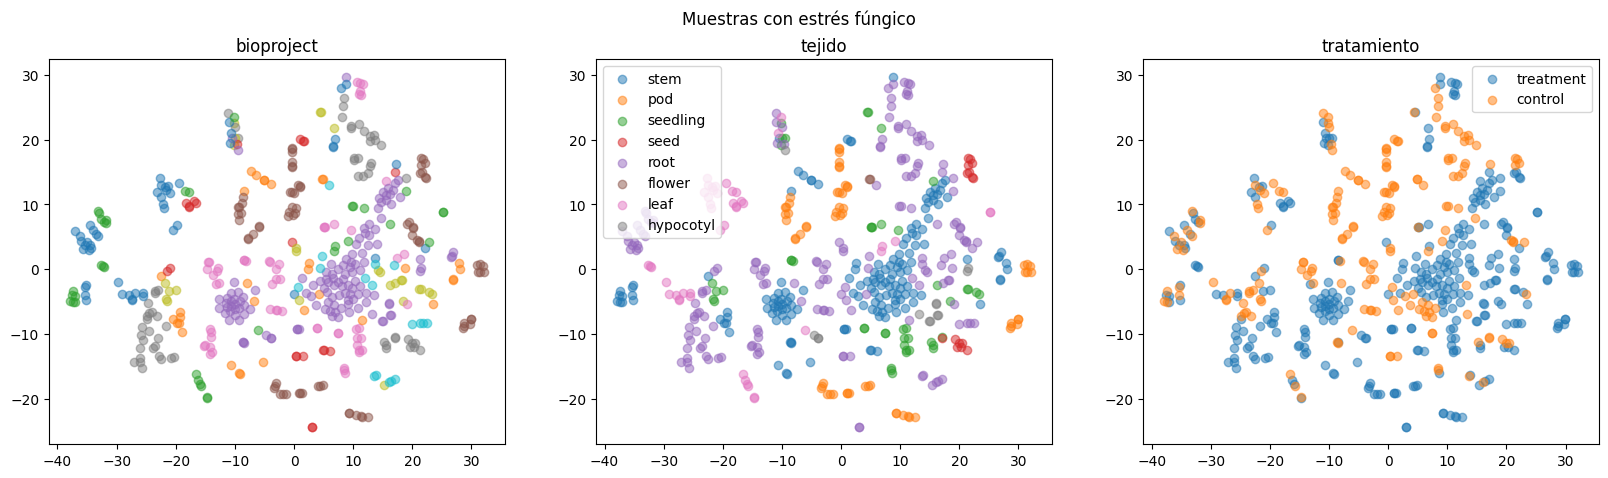

In [8]:
plot_los_tres(X, y.rename(columns={'estres': 'es', 'tratamiento': 'estres'}))
plt.title('tratamiento')
plt.suptitle('Muestras con estrés fúngico')

In [63]:
len(y['bioproject'].unique())

25

In [9]:
y = y['tratamiento']

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)
X_train

Gene          Glyma.01G000100  Glyma.01G000137  Glyma.01G000174  \
SAMN08469976       117.772850        15.055886        23.526640   
SAMN09214186        82.478638        26.611920        18.729909   
SAMN27511821        12.966068         6.299159         9.198162   
SAMN09513392        25.120213         6.128621        16.749401   
SAMN09214169       106.744232         5.223058        44.055744   
...                       ...              ...              ...   
SAMN12868622        47.131199        10.030220        25.282806   
SAMN09214177        33.947450         8.787868        23.478503   
SAMN12868656       -20.189834        -5.103303         8.945701   
SAMN02225590        25.526722         9.306932        22.901591   
SAMN12040117       -12.062045         2.320494        -3.931793   

Gene          Glyma.01G000211  Glyma.01G000248  Glyma.01G000285  \
SAMN08469976        19.891148        20.185194        18.000405   
SAMN09214186        11.758263        23.558914        28.330577   
SAMN27511821        12.429976        15.651620        17.270979   
SAMN09513392         5.382816        13.164198         8.791019   
SAMN09214169        20.751007        18.763656         8.884350   
...                       ...              ...              ...   
SAMN12868622        14.850840        22.410592        22.520192   
SAMN09214177        20.751007         4.377881         8.884350   
SAMN12868656        11.977400        11.470259        17.519356   
SAMN02225590         6.351062         9.876979        12.066272   
SAMN12040117         5.882575         0.902299        16.740851   

Gene          Glyma.01G000322  Glyma.01G000359  Glyma.01G000400  \
SAMN08469976        37.261256         7.896955       234.636697   
SAMN09214186        36.201946        46.563802       540.062176   
SAMN27511821        45.331849        12.726825       238.039637   
SAMN09513392        32.517169        11.199996       208.032079   
SAMN09214169        57.638990        18.829295       488.750523   
...                       ...              ...              ...   
SAMN12868622        47.920795        27.578167       430.757139   
SAMN09214177        31.608293         9.584459       229.173923   
SAMN12868656        44.555005       -13.106588       -51.573851   
SAMN02225590        15.188152         8.570040        86.820778   
SAMN12040117        39.075302         0.910931       147.229500   

Gene          Glyma.01G000600  ...  Glyma.U044501  Glyma.U044700  \
SAMN08469976       271.355787  ...       1.214885       1.275325   
SAMN09214186       478.333392  ...       0.940883       0.308496   
SAMN27511821       248.818927  ...       0.976363       0.839961   
SAMN09513392       257.320524  ...       1.333622       0.648938   
SAMN09214169       537.146718  ...       0.940883       0.308496   
...                       ...  ...            ...            ...   
SAMN12868622       223.259417  ...      -0.958753       0.940500   
SAMN09214177       353.705155  ...       0.940883       0.308496   
SAMN12868656       -85.119491  ...      -0.958753       0.940500   
SAMN02225590        46.935190  ...       1.373863       2.768599   
SAMN12040117       286.512877  ...       0.545545       0.723805   

Gene          Glyma.U044800  Glyma.U045000  Glyma.U045100  Glyma.U045402  \
SAMN08469976       7.723394       0.138552       0.018722       5.648304   
SAMN09214186       7.601078       0.142411       0.018815       2.423453   
SAMN27511821       3.484756       0.116734       0.011969       8.370150   
SAMN09513392      10.165078       0.154807       0.022922       4.033717   
SAMN09214169       7.601078       0.142411       0.018815       2.423453   
...                     ...            ...            ...            ...   
SAMN12868622       7.302491       0.142189       0.018488      11.062075   
SAMN09214177       7.601078       0.142411       0.018815       4.283182   
SAMN12868656       7.302491       0.142189       0.018488       1.285501   
SAMN0222

## Alternativos
### Random forest

In [11]:
random_forest = ensemble.RandomForestClassifier()
params = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(20, 50, 10),
    'min_samples_split': np.arange(2, 15, 4),
    'min_samples_leaf': np.arange(2, 15, 4),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

In [12]:
search = model_selection.RandomizedSearchCV(estimator=random_forest, param_distributions=params, n_jobs=-1, scoring='roc_auc_ovr', verbose=2)

search.fit(X_train, y_train)
search.cv_results_['mean_test_score'].mean()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=300; total time=   2.5s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=300; total time=   2.6s[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=300; total time=   2.6s

[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=300; 

0.9092445869580408

In [13]:
forest = search.best_estimator_
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
forest.score(X_test, y_test)

0.84251968503937

In [15]:
metrics.f1_score(y_test, forest.predict(X_test), pos_label='treatment')

0.8876404494382022

Text(0.5, 1.0, 'Importancias de features ordenadas (Random Forest)')

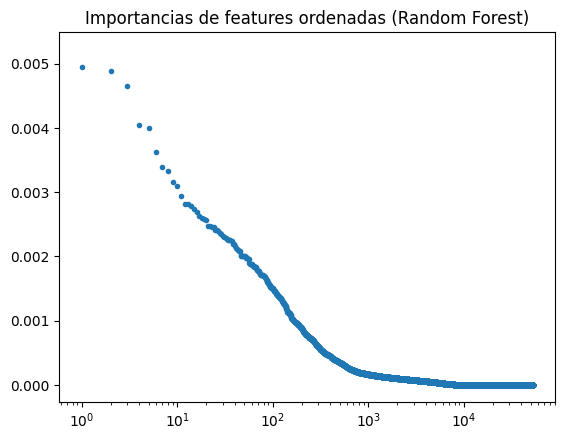

In [16]:
importances = pd.DataFrame({'importance': np.flip(np.sort(forest.feature_importances_))}, index=X_train.columns[np.flip(forest.feature_importances_.argsort())])
plt.semilogx(importances['importance'].to_list(), '.')
plt.title('Importancias de features ordenadas (Random Forest)')

In [17]:
importances.to_csv('importancias_2_rf.csv')

### Gradient boosting

In [18]:
gbr = ensemble.GradientBoostingClassifier()
params = {
    "loss": ['log_loss'],
    "learning_rate": np.arange(0, 10, 1),
    "n_estimators": np.arange(1, 200, 1),
    "max_depth": np.arange(1, 50, 1),
    "max_features": ['sqrt', 'log2']
}

In [21]:
try:
    with open('gradient_2.pkl', 'rb') as f:
        gradient = load(f)
except:
    search = model_selection.RandomizedSearchCV(gbr, param_distributions=params, n_jobs=-1, scoring='roc_auc_ovr', verbose=3)
    search.fit(X_train, y_train)

    gradient = search.best_estimator_
    with open('gradient_2.pkl', 'wb') as f:
        dump(gradient, f, protocol=5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=6, loss=log_loss, max_depth=34, max_features=log2, n_estimators=160;, score=0.740 total time=   1.0s
[CV 2/5] END learning_rate=6, loss=log_loss, max_depth=34, max_features=log2, n_estimators=160;, score=0.817 total time=   1.0s
[CV 1/5] END learning_rate=1, loss=log_loss, max_depth=49, max_features=log2, n_estimators=64;, score=0.891 total time=   1.0s
[CV 2/5] END learning_rate=1, loss=log_loss, max_depth=49, max_features=log2, n_estimators=64;, score=0.842 total time=   0.9s
[CV 3/5] END learning_rate=6, loss=log_loss, max_depth=34, max_features=log2, n_estimators=160;, score=0.741 total time=   1.2s
[CV 5/5] END learning_rate=6, loss=log_loss, max_depth=34, max_features=log2, n_estimators=160;, score=0.782 total time=   1.1s
[CV 4/5] END learning_rate=6, loss=log_loss, max_depth=34, max_features=log2, n_estimators=160;, score=0.743 total time=   1.2s
[CV 1/5] END learning_rate=4, loss=log_loss, 

In [22]:
gradient.score(X_test, y_test)

0.8346456692913385

In [23]:
metrics.f1_score(y_test, gradient.predict(X_test), pos_label='treatment')

0.8786127167630058

Text(0.5, 1.0, 'Importancias de features ordenadas (Gradient boosted trees)')

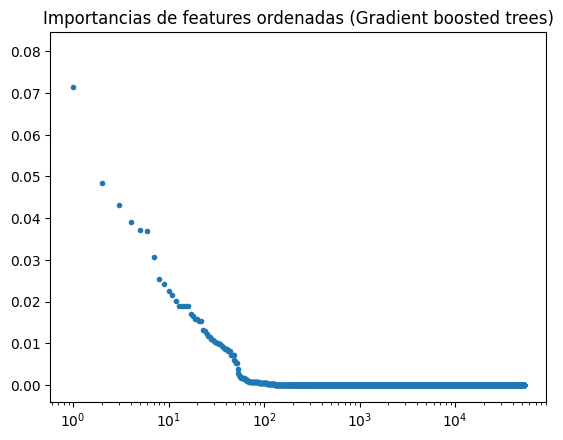

In [24]:
importances = pd.DataFrame({'importance': np.flip(np.sort(gradient.feature_importances_))}, index=X_train.columns[np.flip(gradient.feature_importances_.argsort())])
plt.semilogx(importances['importance'].to_list(), '.')
plt.title('Importancias de features ordenadas (Gradient boosted trees)')

In [25]:
importances.to_csv('importancias_2_gbr.csv')

## Tradicionales
### DESeq2

In [26]:
from pydeseq2.ds import DeseqStats, DefaultInference, DeseqDataSet
import dash_bio

In [39]:
fil, ann = filtrado.align(y, join='inner', axis=0)
fil

Gene          Glyma.01G000100  Glyma.01G000137  Glyma.01G000174  \
SAMN05915160               90               23               16   
SAMN05915163              103               23               37   
SAMN05915166              137               36               55   
SAMN05915169              107               30               56   
SAMN09214162              114               24               41   
...                       ...              ...              ...   
SAMN02225597               13                2                6   
SAMN02225598                9                4                2   
SAMN02225601               11                1                3   
SAMN02225602               18                2                2   
SAMN02225610               11                0                3   

Gene          Glyma.01G000211  Glyma.01G000248  Glyma.01G000285  \
SAMN05915160                8               15                7   
SAMN05915163               25               23               18   
SAMN05915166               31               59               39   
SAMN05915169               70               46               32   
SAMN09214162               27               57               43   
...                       ...              ...              ...   
SAMN02225597                4                3                5   
SAMN02225598                2                2                4   
SAMN02225601                4                5                5   
SAMN02225602                6                2                3   
SAMN02225610                4                2                3   

Gene          Glyma.01G000322  Glyma.01G000359  Glyma.01G000400  \
SAMN05915160               18               16              326   
SAMN05915163               29               34              344   
SAMN05915166               61               25              684   
SAMN05915169               84               36              569   
SAMN09214162               84               15              606   
...                       ...              ...              ...   
SAMN02225597               29                4              179   
SAMN02225598                7                1              119   
SAMN02225601               13                4              152   
SAMN02225602               15                1              199   
SAMN02225610               11                3              165   

Gene          Glyma.01G000600  ...  Glyma.U044501  Glyma.U044700  \
SAMN05915160              209  ...              0              0   
SAMN05915163              244  ...              0              0   
SAMN05915166              463  ...              1              0   
SAMN05915169              411  ...              0              0   
SAMN09214162              586  ...              0              0   
...                       ...  ...            ...            ...   
SAMN02225597              153  ...              0              1   
SAMN02225598               91  ...              0              0   
SAMN02225601              143  ...              0              0   
SAMN02225602              140  ...              0              0   
SAMN02225610               92  ...              0              0   

Gene          Glyma.U044800  Glyma.U045000  Glyma.U045100  Glyma.U045402  \
SAMN05915160              0              0              0              4   
SAMN05915163              0              0              0              3   
SAMN05915166              0              1              0             15   
SAMN05915169              0              0              0             16   
SAMN09214162              0              0              0              2   
...                     ...            ...            ...            ...   
SAMN02225597              0              0              0              1   
SAMN02225598              0              0              0              1   
SAMN02225601              0              0              0              1   
SAMN0222

In [40]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=fil,
    metadata=pd.DataFrame({'tratamiento': ann}),
    design_factors="tratamiento",  # compare samples based on the "condition"
    refit_cooks=True,
    inference=inference,
)

In [41]:
dds.deseq2()

Fitting size factors...
... done in 0.94 seconds.

Fitting dispersions...
... done in 19.44 seconds.

Fitting dispersion trend curve...
... done in 1.01 seconds.

Fitting MAP dispersions...
... done in 16.17 seconds.

Fitting LFCs...
... done in 13.65 seconds.

Calculating cook's distance...
... done in 2.38 seconds.

Replacing 7959 outlier genes.

Fitting dispersions...
... done in 3.24 seconds.

Fitting MAP dispersions...
... done in 2.46 seconds.

Fitting LFCs...
... done in 2.65 seconds.



In [42]:
soy_stat = DeseqStats(dds, alpha=0.05, cooks_filter=True, independent_filter=True)
soy_stat.summary()

Running Wald tests...
... done in 3.59 seconds.



Log2 fold change & Wald test p-value: tratamiento treatment vs control
                  baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Gene                                                                           
Glyma.01G000100  23.129581       -0.540319  0.105736 -5.110086  3.220117e-07   
Glyma.01G000137   2.654500       -0.687531  0.238435 -2.883518  3.932600e-03   
Glyma.01G000174  10.975417       -0.292603  0.129529 -2.258985  2.388432e-02   
Glyma.01G000211   8.534988       -0.444883  0.165383 -2.690008  7.145023e-03   
Glyma.01G000248   7.191632       -0.337947  0.154018 -2.194209  2.822039e-02   
...                    ...             ...       ...       ...           ...   
Glyma.U045402     3.001158        0.053140  0.222314  0.239029  8.110829e-01   
Glyma.U045502     0.532254        0.009698  0.465804  0.020821  9.833886e-01   
Glyma.U045602     1.078643       -0.196453  0.293623 -0.669066  5.034534e-01   
Glyma.U045702     0.872929       -0.023737  0.334

In [43]:
np.log(soy_stat.p_values)

Gene
Glyma.01G000100   -14.948678
Glyma.01G000137    -5.538455
Glyma.01G000174    -3.734533
Glyma.01G000211    -4.941339
Glyma.01G000248    -3.567710
                     ...    
Glyma.U045402      -0.209385
Glyma.U045502      -0.016751
Glyma.U045602      -0.686264
Glyma.U045702      -0.058290
Glyma.U045802      -2.893864
Length: 52689, dtype: float64

Text(0.5, 1.0, 'Volcano plot PRJNA706999')

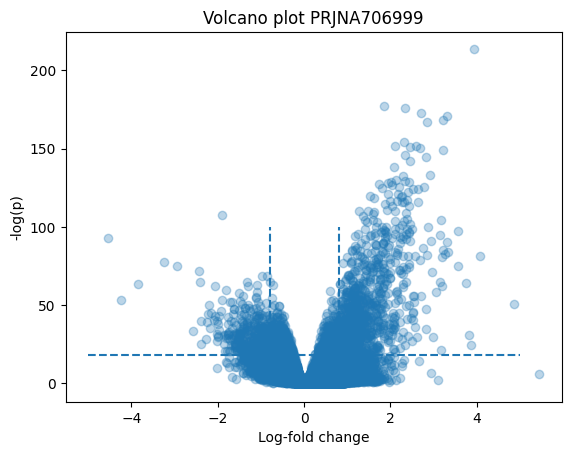

In [47]:
plt.scatter(soy_stat.LFC['tratamiento_treatment_vs_control'], -np.log(soy_stat.p_values), alpha=0.3)
plt.ylabel('-log(p)')
plt.xlabel('Log-fold change')
plt.hlines(18, xmin=-5, xmax=5, linestyles='dashed')
plt.vlines([-0.8, 0.8], ymin=-1, ymax=100, linestyles='dashed')
# plt.xlim(-3, 3)
# plt.ylim(0, 50)
plt.title('Volcano plot PRJNA706999')

In [48]:
res = soy_stat.results_df[soy_stat.results_df['pvalue'].notna()].reset_index()
res['SNP'] = '1'
dash_bio.VolcanoPlot(dataframe=res.rename({
    'pvalue': 'P',
    'Gene': 'GENE',
    'log2FoldChange': 'EFFECTSIZE'
    # GENE
}, axis=1))